In [45]:
!pip install tensorflow-gpu===2.8.0

In [46]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [49]:
## Divide the dataset into independent and dependent feature
x=dataset.iloc[:,3:13].values
y=dataset.iloc[:,13].values



In [50]:
x.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [51]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [52]:
##feature engineering
geography = pd.get_dummies(dataset,columns=['Geography'],drop_first=True)
gender = pd.get_dummies(dataset,columns=['Gender'],drop_first=True)

In [53]:
## concatenate these variable with dataframes
dataset=pd.concat([dataset,geography,gender],axis=1)

In [54]:

dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,...,France,42,2,0.00,1,1,1,101348.88,1,False
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,...,Spain,41,1,83807.86,1,0,1,112542.58,0,False
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,...,France,42,8,159660.80,3,1,0,113931.57,1,False
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,...,France,39,1,0.00,2,0,0,93826.63,0,False
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,...,Spain,43,2,125510.82,1,1,1,79084.10,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,...,France,39,5,0.00,2,1,0,96270.64,0,True
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,...,France,35,10,57369.61,1,1,1,101699.77,0,True
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,...,France,36,7,0.00,1,0,1,42085.58,1,False
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,...,Germany,42,3,75075.31,2,1,0,92888.52,1,True


In [55]:
## feature engineering
geography = pd.get_dummies(dataset,columns=['Geography'],drop_first=True)
gender = pd.get_dummies(dataset,columns=['Gender'],drop_first=True)

In [56]:
# Assuming 'dataset' is your original DataFrame
x = dataset.copy()  # Create a copy of your DataFrame

## concatenate these variable with dataframe
X = x.drop(['Geography','Gender'],axis=1)

In [57]:
X.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,...,619,42,2,0.00,1,1,1,101348.88,1,False
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,...,608,41,1,83807.86,1,0,1,112542.58,0,False
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,...,502,42,8,159660.80,3,1,0,113931.57,1,False
3,4,15701354,Boni,699,39,1,0.00,2,0,0,...,699,39,1,0.00,2,0,0,93826.63,0,False
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,...,850,43,2,125510.82,1,1,1,79084.10,0,False


In [58]:
X=pd.concat([X,geography,gender],axis=1)

In [59]:
#splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [60]:
#for which all algorithms feature engineering is required
#ANN , Linear Regression , Logistic Regression , Desent


In [61]:
#feature scalling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

ValueError: could not convert string to float: 'Mishin'

In [62]:
## Parts 2 Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [63]:
## lets initialize the ANN
classifier=Sequential()

In [104]:
## Adding the input Layer
classifier.add(Dense(units=11,activation='relu'))
classifier.add(Dropout(0.3))

In [105]:
## adding thefirestlayer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.3))

In [106]:
## addint the six layer
classifier.add(Dense(units = 6 , activation = 'relu'))
classifier.add(Dropout(0.3))

In [107]:
##adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))
classifier.add(Dropout(0.3))

In [108]:
## Compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [109]:
import tensorflow

In [110]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [111]:
##Early Stopping
import tensorflow as tf


In [112]:
# Instantiate the EarlyStopping callback and assign it to the variable 'early_stopping'
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)



In [113]:
X_train_numeric = X_train.select_dtypes(include=np.number).astype(np.float32)  # Select numeric columns and convert to float32
y_train = y_train.astype(np.float32)  # Convert to float32

model_history = classifier.fit(
    X_train_numeric.values, # Use .values to get the underlying NumPy array
    y_train,
    validation_split=0.33,
    batch_size=10,
    epochs=1000,
    callbacks=[early_stopping] # Pass the instantiated callback as a list
)

Epoch 1/1000
536/536 [==============================] - 3s 4ms/step - loss: 1.4034 - accuracy: 0.6335 - val_loss: 0.5076 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 1.3319 - accuracy: 0.7529 - val_loss: 0.5080 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 3s 6ms/step - loss: 1.3350 - accuracy: 0.7597 - val_loss: 0.5103 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 2s 3ms/step - loss: 1.3249 - accuracy: 0.7828 - val_loss: 0.5113 - val_accuracy: 0.7955
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 1.3589 - accuracy: 0.7962 - val_loss: 0.5165 - val_accuracy: 0.7955
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 1.3122 - accuracy: 0.7962 - val_loss: 0.5153 - val_accuracy: 0.7955
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 1.3091 - accuracy: 0.7962 - val_loss: 0.5133 - val_accuracy:

In [114]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

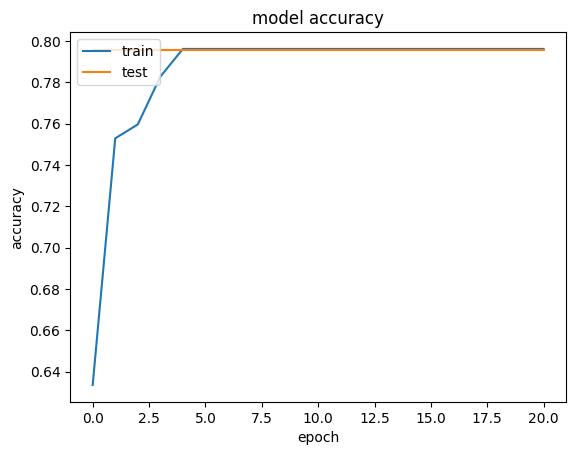

In [115]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

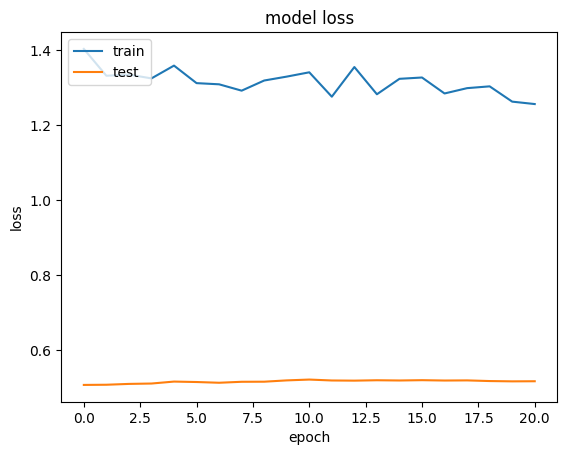

In [116]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [117]:
# part 3 : Making the predictions and evaluting the model

# predicting the Test set Results
X_test_numeric = X_test.select_dtypes(include=np.number).astype(np.float32) # Select numeric columns and convert to float32 to match the model's input
y_pred = classifier.predict(X_test_numeric)
y_pred = (y_pred > 0.5)

In [118]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1595,    0],
       [ 405,    0]])

In [119]:
  ## calculate the acuracy score
  from sklearn.metrics import accuracy_score
  score=accuracy_score(y_pred,y_test)

In [120]:
score

0.7975

In [121]:
## get the weight
classifier.get_weights()

[array([[ 0.190949  , -0.2318223 ,  0.06292456, ...,  0.18045156,
         -0.00676493, -0.10856255],
        [ 0.00877964, -0.08556676, -0.10029893, ...,  0.09699392,
         -0.00575569, -0.16158746],
        [-0.00727476,  0.22371763,  0.03372723, ...,  0.16530566,
          0.06083405, -0.19085373],
        ...,
        [-0.14770323, -0.18254432, -0.08464977, ..., -0.21352747,
         -0.08638145,  0.02963406],
        [ 0.17981693, -0.20683524,  0.13506964, ...,  0.09907066,
         -0.02412587,  0.21511602],
        [ 0.16811687, -0.22405575, -0.1217718 , ...,  0.0789328 ,
         -0.11051244, -0.10157305]], dtype=float32),
 array([ 0.        ,  0.        ,  0.        , -0.05105869,  0.        ,
        -0.00704745,  0.        ,  0.        , -0.01567011,  0.        ,
         0.        ], dtype=float32),
 array([[-0.32480907,  0.44232798,  0.41090083, -0.02823377, -0.03991729,
          0.38362902,  0.38711268],
        [ 0.10278404,  0.56595004,  0.48267174,  0.20976657,  0.